<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.10.0+cpu


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

* `use data` with high quality: data with clear patterns that model learn them
* `transfer` leaening: use model that learn befor with millions of data can fix under fitting
* `more data`: using a lot og data couse model lean better in data 

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
print("hello")

In [1]:
# 1. Get data
from pathlib import Path
import requests
import zipfile
down_path = Path(".")
img_path = down_path / "pizza_steak_sushi"
if img_path.is_dir():
    print("directory already exist...")
else:
    down_path.mkdir(exist_ok=True)
    path_1 = down_path/"pizza_steak_sushi.zip"
    if not path_1.is_file():
        with open(file=down_path/"pizza_steak_sushi.zip", mode="wb") as f:
            req = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
            f.write(req.content)
        print("downloading..")
    with zipfile.ZipFile(down_path/"pizza_steak_sushi.zip", "r") as f:
        print("extracking...")
        f.extractall(down_path/"pizza_steak_sushi")
down_path /= "pizza_steak_sushi"
type(down_path)

directory already exist...


pathlib.WindowsPath

In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
# Setup train and testing paths
train_path = down_path / "train"
test_path = down_path / "test"
train_path

WindowsPath('pizza_steak_sushi/train')

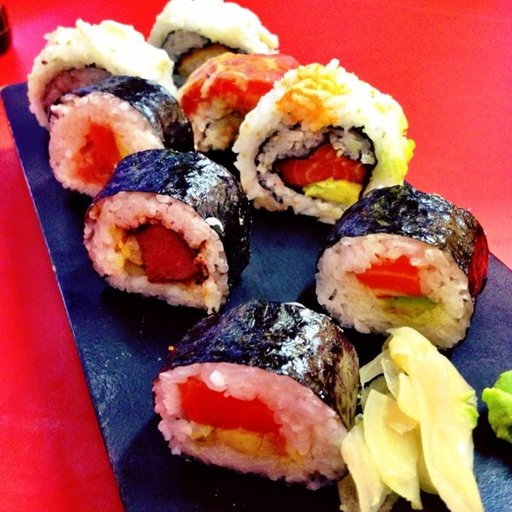

In [15]:
# Visualize an image
import random
from PIL import Image
list_image_pathes = list(down_path.glob("*/*/*.jpg"))
random_image = random.choice(list_image_pathes)
img = Image.open(random_image)
img_class = random_image.parent.stem
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

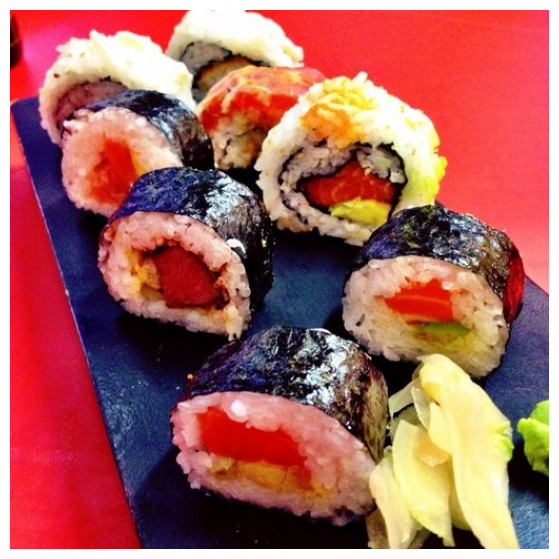

In [17]:
 # Do the image visualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np
img_as_numpy = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_numpy)
plt.axis("off")

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [22]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

In [23]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [24]:
# Write a function to plot transformed images
def plot_transformwed_image(datasets):
    rows, culomns = 3, 3
    plt.figure(figsize=(15, 7))
    r_img = torch.randint(low=0, high=len(datasets), size=(9, ))
    for i in range(len(r_img)):
        plt.subplot(rows, culomns, i+1)
        plt.imshow(datasets[r_img[i]].cpu())
        

### Load image data using `ImageFolder`

In [25]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_datasets = datasets.ImageFolder(root=train_path,
                                      transform=data_transform,
                                      target_transform=None)
test_datasets = datasets.ImageFolder(root=test_path,
                                     transform=data_transform)

In [26]:
# Get class names as a list
class_names = train_datasets.classes
class_names

['pizza', 'steak', 'sushi']

In [27]:
# Can also get class names as a dict
class_dict = train_datasets.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
# Check the lengths of each dataset
len(train_datasets), len(test_datasets)

(225, 75)

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_datasets,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_datasets,
                             batch_size=BATCH_SIZE)

In [ ]:
# How many batches of images are in our data loaders?
train_dataloader.batch_size

32

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [10]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units=10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classify_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.classify_layer(self.conv_block_2(self.conv_block_1(x)))
model_0 = TinyVGG(input_shape=3, output_shape=10, hidden_units=10).to(device)

## 4. Create training and testing functions for `model_0`.

In [11]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for (X, y) in dataloader:
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_logits = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss.item()
    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    train_acc += (torch.argmax(y_logits, dim=1) == y).sum().item() / len(y_logits)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

In [12]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for (X, y) in dataloader:
      # Send data to target device
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      y_t_logits = model(X)
      

      # 2. Calculuate and accumulate loss
      test_loss += loss_fn(y_t_logits, y).item()

      # Calculate and accumulate accuracy
      test_acc += (torch.argmax(y_t_logits, dim=1) == y).sum().item() / len(y_t_logits)

    
  # Adjust metrics to get average loss and accuracy per batch
  test_acc /= len(dataloader)
  test_loss /= len(dataloader)
  return test_loss, test_acc

In [13]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=5)

In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
model_1 = TinyVGG(input_shape=3, output_shape=10, hidden_units=10).to(device)
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)
train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
model_2 = TinyVGG(input_shape=3, output_shape=10, hidden_units=10).to(device)
optimizer = torch.optim.Adam(model_2.parameters(), 
                             lr=0.001)

train(model=model_2,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=50)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  output_shape=10,
                  hidden_units=20).to(device)
optimizer = torch.optim.Adam(model_3.parameters(), 
                             lr=0.001)
train(model=model_3,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [4]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("./")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
#     print("Downloading pizza, steak, sushi 20% data...")
#     f.write(request.content)

# # Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi 20% data...") 
#     zip_ref.extractall(image_path)

pizza_steak_sushi_20_percent directory exists.


In [5]:
# See how many images we have
import os
def walk_through_dir(image_path):
    for dirpath, dirnames, filenames in os.walk(image_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path=image_path)

There are 2 directories and 0 images in 'pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [7]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('pizza_steak_sushi_20_percent/train'),
 WindowsPath('pizza_steak_sushi_20_percent/test'))

In [14]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_datasets = ImageFolder(root=train_data_20_percent_path,
                             transform=simple_transform)
test_datasets = ImageFolder(root=test_data_20_percent_path,
                             transform=simple_transform)
# Create dataloaders
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_datasets,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_datasets,
                              batch_size=BATCH_SIZE)

In [15]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3, output_shape=10, hidden_units=20).to(device)
optimizer = torch.optim.Adam(model_4.parameters(), 
                             lr=0.001)
train(model=model_4,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

NameError: name 'loss_fn' is not defined

In [17]:
model_5 = TinyVGG(input_shape=3, output_shape=10, hidden_units=20)
model_5.load_state_dict(torch.load(f="model_4.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

label: pizza model predict: pizza


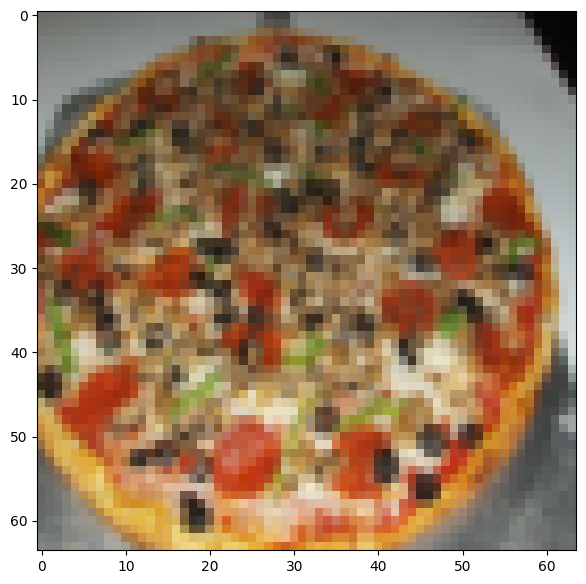

In [65]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
test_trainform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
import matplotlib.pyplot as plt
test_datasets = ImageFolder(root="./pizza_steak_sushi_20_percent/test",
                        transform=test_trainform)
model_5.eval()
image, label = test_datasets[torch.randint(low=0, high=len(test_datasets), size=(1, )).item()]
class_dict = test_datasets.classes
with torch.inference_mode():
    print(f"label: {class_dict[label]} model predict: {class_dict[model_5(torch.unsqueeze(image, dim=0)).argmax(dim=1).item()]}")
plt.figure(figsize=(10, 7))
plt.imshow(torch.Tensor.numpy((image.permute(1, 2, 0))))